In [1]:
import skimage
from skimage import data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
img1 = mpimg.imread("./Datasets/Images/bg.jpg")

In [5]:
img1

array([[[27, 34, 44],
        [27, 34, 44],
        [29, 33, 44],
        ...,
        [45, 46, 50],
        [45, 46, 50],
        [45, 46, 50]],

       [[27, 35, 48],
        [28, 34, 48],
        [28, 34, 48],
        ...,
        [45, 46, 51],
        [45, 46, 51],
        [45, 46, 51]],

       [[24, 33, 48],
        [24, 33, 48],
        [24, 33, 48],
        ...,
        [45, 46, 51],
        [45, 46, 51],
        [45, 46, 51]],

       ...,

       [[ 5,  6, 11],
        [ 5,  6, 11],
        [ 5,  6, 11],
        ...,
        [45, 20, 23],
        [45, 20, 23],
        [45, 20, 23]],

       [[ 4,  5, 10],
        [ 4,  5, 10],
        [ 4,  5, 10],
        ...,
        [43, 21, 23],
        [43, 21, 23],
        [43, 21, 23]],

       [[ 4,  5, 10],
        [ 4,  5, 10],
        [ 4,  5, 10],
        ...,
        [44, 22, 24],
        [44, 22, 24],
        [43, 21, 23]]], dtype=uint8)

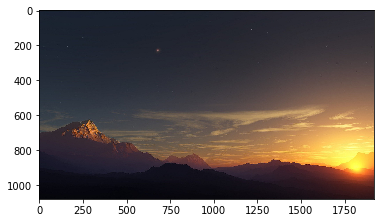

In [6]:
plt.imshow(img1)

In [7]:
img1.shape

(1080, 1920, 3)

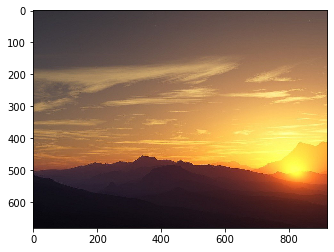

In [9]:
plt.imshow(img1[400:1080, 1000:])

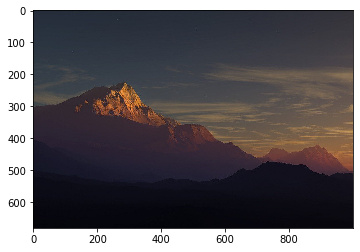

In [10]:
plt.imshow(img1[400:1080, :1000])

In [11]:
resize = skimage.transform.resize(img1, (500,500))

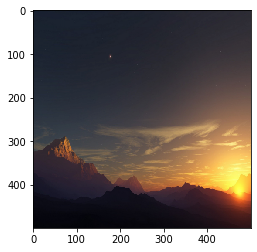

In [13]:
plt.imshow(resize)

In [16]:
#aspect_ration
aspect_ration_original = img1.shape[1]/img1.shape[0]
aspect_ration_resized = resize.shape[1]/resize.shape[0]

In [17]:
aspect_ration_original

1.7777777777777777

In [18]:
aspect_ration_resized

1.0

In [19]:
img1_rescale = skimage.transform.rescale(resize, (1.0, aspect_ration_original))

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


In [20]:
img1_rescale

array([[[0.10446582, 0.12855378, 0.17887492],
        [0.10495547, 0.12806414, 0.17859093],
        [0.10716108, 0.12585853, 0.17731167],
        ...,
        [0.17647059, 0.17668422, 0.19607843],
        [0.17647059, 0.17796348, 0.19607843],
        [0.17647059, 0.17824747, 0.19607843]],

       [[0.08917171, 0.1254322 , 0.1934816 ],
        [0.08966135, 0.1253991 , 0.19340776],
        [0.09186696, 0.12525   , 0.19307515],
        ...,
        [0.17647059, 0.17647059, 0.2       ],
        [0.17647059, 0.17647059, 0.2       ],
        [0.17647059, 0.17647059, 0.2       ]],

       [[0.08649758, 0.13131732, 0.20017769],
        [0.08662489, 0.13101276, 0.20014929],
        [0.08719835, 0.12964087, 0.20002136],
        ...,
        [0.17647059, 0.17647059, 0.20766462],
        [0.17647059, 0.17647059, 0.20894387],
        [0.17647059, 0.17647059, 0.20922786]],

       ...,

       [[0.01746316, 0.02138472, 0.04099257],
        [0.01717916, 0.02110073, 0.04070857],
        [0.01589991, 0

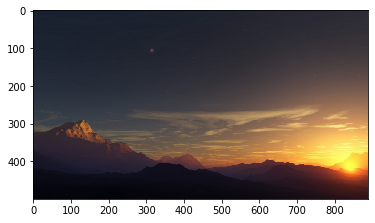

In [22]:
plt.imshow(img1_rescale)

In [23]:
gray_img = skimage.color.rgb2gray(img1)


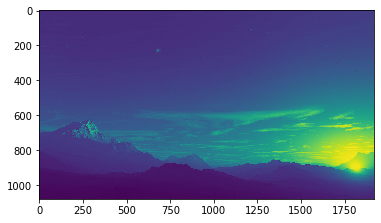

In [24]:
plt.imshow(gray_img)

In [25]:
gray_img.shape

(1080, 1920)

In [26]:
# simply add some noice
from skimage.util import random_noise


In [27]:
sigma = 0.199
noisy_img = random_noise(img1, var = sigma**2)

In [28]:
noisy_img

array([[[0.23913196, 0.19449478, 0.05399915],
        [0.04122128, 0.        , 0.        ],
        [0.02742209, 0.52520948, 0.43939431],
        ...,
        [0.22209846, 0.03237955, 0.41066865],
        [0.44879896, 0.04496657, 0.35791154],
        [0.33747885, 0.        , 0.33574562]],

       [[0.33815632, 0.17204927, 0.        ],
        [0.        , 0.        , 0.05934298],
        [0.38420342, 0.14933362, 0.24711403],
        ...,
        [0.        , 0.49109018, 0.43533369],
        [0.21790836, 0.27349524, 0.34221188],
        [0.18230825, 0.43902928, 0.22774098]],

       [[0.13574069, 0.0573225 , 0.28224349],
        [0.33343867, 0.38518113, 0.20814869],
        [0.        , 0.15667483, 0.1577201 ],
        ...,
        [0.19388545, 0.4457565 , 0.19590636],
        [0.1907885 , 0.08824666, 0.18600802],
        [0.17373637, 0.08084073, 0.        ]],

       ...,

       [[0.17998328, 0.10853485, 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

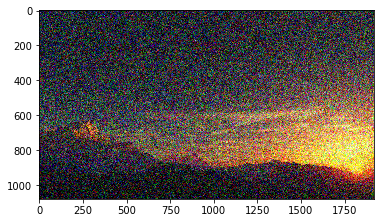

In [29]:
plt.imshow(noisy_img)

In [31]:
from skimage.restoration import denoise_bilateral,denoise_tv_chambolle, estimate_sigma

In [34]:
sigma = estimate_sigma(noisy_img, multichannel=True, average_sigmas = True)

In [35]:
sigma

0.16802880431161174

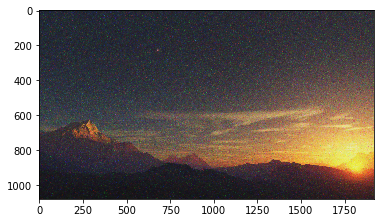

In [36]:
plt.imshow(denoise_tv_chambolle(noisy_img,
                               weight = 0.1,
                               multichannel= True))

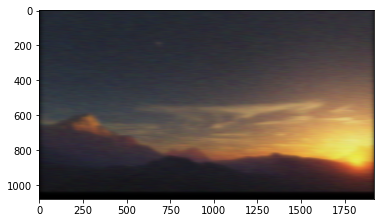

In [37]:
plt.imshow(denoise_bilateral(noisy_img,
                            sigma_color = 0.05,
                            sigma_spatial = 15,
                            multichannel = True))

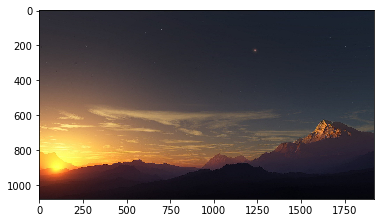

In [38]:
mirror_flip = np.fliplr(img1)
plt.imshow(mirror_flip)
